# Neurons as logic gates


In [172]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Sigmoid function**


In [173]:
#Define the sigmoid function
def sigmoid(x):
  """Sigmoid function"""
  return 1.0 / (1.0 + np.exp(-x))

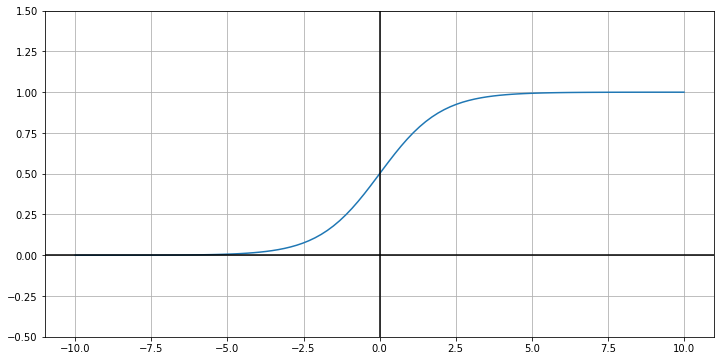

In [174]:
#Plot the sigmoid function
vals = np.linspace(-10, 10, num=100, dtype=np.float32)
activation = sigmoid(vals)
fig = plt.figure(figsize=(12,6))
plt.plot(vals, activation)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks()
plt.ylim([-0.5, 1.5]);

**Sigmoid as OR, AND, NOR and NAND gate**


How to choose weights and bias to gate works properly. OR - if both inputs are 0 -> sig(z) = 0, if any of input is 1 -> sig(z) = 1

In [175]:
def logic_gate(w1, w2, b):
  #helper to create logic gate functions
  #plug in values for weights and bias
  return lambda x1, x2: sigmoid(w1 * x1 + w2 * x2 + b)

def test_gate(gate):
  #helper function to test the weight function
  for a,b in (0,0), (0,1), (1,0), (1,1):
    print("{}, {}: {}".format(a, b, np.round(gate(a, b))))

In [176]:
or_gate = logic_gate(20, 20, -10)
test_gate(or_gate)

0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 1.0


AND - if both or one of inputs is 0 -> sig(z) = 0, if both of them are 1 -> sig(z) = 1

In [177]:
and_gate = logic_gate(15, 15, -20)
test_gate(and_gate)

0, 0: 0.0
0, 1: 0.0
1, 0: 0.0
1, 1: 1.0


NOR - any of inputs cannot be 1 to return sig(z) = 1

In [178]:
nor_gate = logic_gate(-20, -20, 10)
test_gate(nor_gate)

0, 0: 1.0
0, 1: 0.0
1, 0: 0.0
1, 1: 0.0


NAND - only if both inputs are 1 sig(z) = 0

In [179]:
nand_gate = logic_gate(-20, -20, 30)
test_gate(nand_gate)

0, 0: 1.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


XOR gate is impossible to perform using single neuron so we are made to use something more complex:

In [180]:
def xor_gate(a, b):
  c = or_gate(a, b)
  d = nand_gate(a, b)
  return and_gate(c, d)
test_gate(xor_gate)


0, 0: 0.0
0, 1: 1.0
1, 0: 1.0
1, 1: 0.0


**Exercise**

Provided below are the following:

Three weight matrices W_1, W_2 and W_3 representing the weights in each layer. The convention for these matrices is that each  Wi,j  gives the weight from neuron  i  in the previous (left) layer to neuron  j  in the next (right) layer.
A vector x_in representing a single input and a matrix x_mat_in representing 7 different inputs.
Two functions: soft_max_vec and soft_max_mat which apply the soft_max function to a single vector, and row-wise to a matrix.
The goals for this exercise are:

For input x_in calculate the inputs and outputs to each layer (assuming sigmoid activations for the middle two layers and soft_max output for the final layer.
Write a function that does the entire neural network calculation for a single input
Write a function that does the entire neural network calculation for a matrix of inputs, where each row is a single input.
Test your functions on x_in and x_mat_in.

In [182]:
#INITIALIZE WEIGHTS ARRAYS FOR EACH LAYER
W_1 = np.array([[2,-1,1,4],[-1,2,-3,1],[3,-2,-1,5]])
W_2 = np.array([[3,1,-2,1],[-2,4,1,-4],[-1,-3,2,-5],[3,1,1,1]])
W_3 = np.array([[-1,3,-2],[1,-1,-3],[3,-2,2],[1,2,1]])

In [183]:
#CREATE SIMPLE, SINGLE INPUT VECTOR
x_in = np.array([0.5, 0.8, 0.2])
x_in

array([0.5, 0.8, 0.2])

In [184]:
#CREATE BUNCH OF INPUT VECTORS MATRIX
x_mat_in = np.array([[0.5, 0.8, 0.2], [0.1, 0.9, 0.6], [0.2, 0.2, 0.3], [0.6, 0.1, 0.9], [0.5, 0.5, 0.4], [0.9, 0.1, 0.9], [0.1, 0.8, 0.7]])
x_mat_in

array([[0.5, 0.8, 0.2],
       [0.1, 0.9, 0.6],
       [0.2, 0.2, 0.3],
       [0.6, 0.1, 0.9],
       [0.5, 0.5, 0.4],
       [0.9, 0.1, 0.9],
       [0.1, 0.8, 0.7]])

In [239]:
#SOFTMAX FUNCTIONS FOR BOTH VECTORS AND MATRIXES
def softmax_vec(vec):
  return np.exp(vec)/(np.sum(np.exp(vec)))

def softmax_mat(mat):
  return np.exp(mat)/(np.sum(np.exp(mat),axis=1).reshape(-1,1))

In [240]:
softmax_vec(x_in)

array([0.3235537 , 0.43675182, 0.23969448])

In [241]:
softmax_mat(x_mat_in)

array([[0.3235537 , 0.43675182, 0.23969448],
       [0.20515925, 0.45659032, 0.33825043],
       [0.32204346, 0.32204346, 0.35591307],
       [0.33825043, 0.20515925, 0.45659032],
       [0.34425335, 0.34425335, 0.31149331],
       [0.40827509, 0.18344982, 0.40827509],
       [0.20678796, 0.41641981, 0.37679223]])

In [188]:
sigmoid(x_in)

array([0.62245933, 0.68997448, 0.549834  ])

In [260]:
def layer_sigmoid_vec(vec,w1):
  '''TAKES THE INPUT VECTOR FOR EACH LAYER AND RETURNS VECTOR OF SIGMOID VALUES'''
  x = np.shape(vec)[0] #number of x for each input
  y = np.shape(w1)[1] #number of neurons in each layer
  layer_result = np.zeros([y]) #empty array of results
  for i in range(0, x):
    for j in range(0, y):
      layer_result[j] += vec.item(i)*w1.item(i,j) #assign neuron sum to a vector
  return sigmoid(layer_result) #execute sigmoid func in output vector


In [261]:
def layer_softmax_vec(vec,w):
  '''TAKES THE INPUT VECTOR FOR EACH LAYER AND RETURNS VECTOR OF SOFTMAX VALUES'''
  x = np.shape(vec)[0] #number of x for each input
  y = np.shape(w)[1] #number of neurons in each layer
  layer_result = np.zeros([y]) #empty array of results
  for i in range(0, x):
    for j in range(0, y):
      layer_result[j] += vec.item(i)*w.item(i,j) #assign neuron sum to a vector
  return softmax_vec(layer_result) #execute softmax func in output vector

In [275]:
def neural_net_vec(vec, w1, w2, w3):
  '''WHOLE NEURAL NET COMPUTATION RETURNS VECTOR OF SOFTMAX VALUES'''
  print('Input vector: {}'.format(vec))
  result_l1 = layer_sigmoid_vec(vec, w1)
  result_l2 = layer_sigmoid_vec(result_l1, w2)
  result_l3 = layer_softmax_vec(result_l2, w3)
  print('Output vector: {}'.format(result_l3))
  return(result_l3)

In [276]:
result = neural_net_vec(x_in, W_1, W_2, W_3)

Input vector: [0.5 0.8 0.2]
Output vector: [0.72780576 0.26927918 0.00291506]


In [284]:
def layer_sigmoid_mat(mat,w1):
  '''TAKES THE INPUT MATRIX FOR EACH LAYER AND RETURNS VECTOR OF SIGMOID VALUES'''
  x = np.shape(mat)[1] #number of x for each input
  y = np.shape(w1)[1] #number of neurons in each layer
  z = np.shape(mat)[0] #number of inputs (vectors)
  layer_result = np.zeros([z, y]) #empty array of results
  for k in range(0, z):
    for i in range(0, x):
      for j in range(0, y):
        layer_result[k,j] += mat.item(k,i)*w1.item(i,j) #assign neuron sum to an array
  return sigmoid(layer_result) #execute softmax func in output array

In [285]:
def layer_softmax_mat(mat,w1):
  '''TAKES THE INPUT MATRIX FOR EACH LAYER AND RETURNS VECTOR OF SOFTMAX VALUES'''
  x = np.shape(mat)[1] #number of x for each input
  y = np.shape(w1)[1] #number of neurons in each layer
  z = np.shape(mat)[0] #number of inputs (vectors)
  layer_result = np.zeros([z, y]) #empty array of results
  for k in range(0, z):
    for i in range(0, x):
      for j in range(0, y):
        layer_result[k,j] += mat.item(k,i)*w1.item(i,j) #assign neuron sum to an array
  return softmax_mat(layer_result) #execute softmax func in output array

In [286]:
def neural_net_mat(mat, w1, w2, w3):
  '''WHOLE NEURAL NET COMPUTATION RETURNS ARRAY OF SOFTMAX VALUES'''
  print('Input matrix: \n{}'.format(mat))
  result_l1 = layer_sigmoid_mat(mat, w1)
  result_l2 = layer_sigmoid_mat(result_l1, w2)
  result_l3 = layer_softmax_mat(result_l2, w3)
  print('Output matrix: \n{}'.format(result_l3))
  return(result_l3)

In [287]:
result_mat = neural_net_mat(x_mat_in, W_1, W_2, W_3)

Input matrix: 
[[0.5 0.8 0.2]
 [0.1 0.9 0.6]
 [0.2 0.2 0.3]
 [0.6 0.1 0.9]
 [0.5 0.5 0.4]
 [0.9 0.1 0.9]
 [0.1 0.8 0.7]]
Output matrix: 
[[0.72780576 0.26927918 0.00291506]
 [0.62054212 0.37682531 0.00263257]
 [0.69267581 0.30361576 0.00370844]
 [0.36618794 0.63016955 0.00364252]
 [0.57199769 0.4251982  0.00280411]
 [0.38373781 0.61163804 0.00462415]
 [0.52510443 0.4725011  0.00239447]]
